In [ ]:
## Portfolio Optimization

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
from pandas import Series, DataFrame
import quandl

In [2]:
# Get a quandl API key from www.quandl.com
quandl.ApiConfig.api_key = 'v8iNViRiecCmAj6z2bgf'

In [3]:
#params
#Universe sourced from http://www.nasdaq.com/article/the-30-dow-jones-stocks-cm881063
stockList = ["MMM", "AXP", "AAPL", "BA", "CAT", "CVX", "CSCO", "KO", "DWDP", "DIS", "XOM", "GE", "GS", "HD", "IBM", "INTC", "JNJ", "JPM", "MCD", "MRK", "MSFT", "NKE", "PFE", "PG", "TRV", "UTX", "UNH", "VZ", "V", "WMT"]
Start_date = "2011-1-1"
End_date = "2015-1-1"

In [4]:
allData = {}
# For simplicity, assume fixed interest rate
interest_rate = 0.03/12.
# Minimum desired return
rmin = 0.02
quotes = []
for ticker in stockList:
    #all_data[ticker] = web.get_data_yahoo(ticker,'1/1/2000','1/1/2014')
    # We will use Google data
    stockData = quandl.get('WIKI/'+ ticker, start_date=Start_date, end_date=End_date)[['Adj. Close']]
    if pd.isnull(stockData['Adj. Close']).all():
        print('Warning: Ticker returned null-',ticker)
        continue
    stockData.columns.values[0] = ticker 
    #print(stock_data)
    if len(quotes)==0:
        quotes = stockData
    else:
        quotes = pd.concat([quotes,stockData],axis =1)

In [12]:
print(quotes)

                   MMM        AXP        AAPL          BA        CAT  \
Date                                                                   
2011-01-03   73.285281  39.204771   42.354338   55.586312  77.197617   
2011-01-04   73.183953  39.701606   42.575382   56.038370  76.836843   
2011-01-05   73.183953  40.848842   42.923655   56.490427  77.500996   
2011-01-06   72.736423  40.567689   42.888956   57.595456  76.697452   
2011-01-07   72.812418  40.232119   43.196105   58.080999  76.853241   
2011-01-10   73.589264  40.322814   44.010241   57.838228  76.574461   
2011-01-11   74.087459  40.848842   43.905502   57.729399  77.033629   
2011-01-12   74.864305  40.812565   44.262770   58.725599  76.656455   
2011-01-13   74.340778  40.866981   44.424698   58.457714  77.189418   
2011-01-14   74.391442  41.946247   44.784537   58.658628  77.082825   
2011-01-18   74.425218  42.055080   43.778273   60.667772  79.263873   
2011-01-19   74.273227  41.030232   43.545663   60.048286  78.69

In [5]:
# Compute monthly returns
monthly = quotes.resample('BM').apply(lambda x: x[-1])
monthlyReturns = monthly.pct_change()

In [6]:
monthlyReturns

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MRK,MSFT,NKE,PFE,PG,UTX,UNH,VZ,V,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-28,0.055271,0.004380,0.040935,0.042407,0.061025,0.101027,-0.122459,0.017025,0.125289,0.065735,...,-0.018089,-0.035609,0.079413,0.067121,-0.001267,0.032686,0.037272,0.036496,0.047953,-0.072945
2011-03-31,0.013770,0.037411,-0.013314,0.026663,0.081803,0.036048,-0.072791,0.045386,-0.014861,-0.016369,...,0.025276,-0.044771,-0.146791,0.055613,-0.022998,0.013287,0.064494,0.043879,0.007803,0.008286
2011-04-29,0.039679,0.090064,0.004656,0.079129,0.040673,0.018141,0.021574,0.016883,0.000232,0.045763,...,0.089064,0.020874,0.087450,0.032496,0.062211,0.058240,0.089159,-0.007094,0.061125,0.056292
2011-05-31,-0.023428,0.051345,-0.006569,-0.016741,-0.083268,-0.033946,-0.041096,-0.009635,-0.034107,-0.045765,...,0.022253,-0.028812,0.025875,0.032816,0.032357,-0.014809,-0.005688,-0.022499,0.039580,0.011010
2011-06-30,0.004980,0.005480,-0.034960,-0.052544,0.006238,-0.019731,-0.070833,0.014454,-0.062215,-0.025039,...,-0.029399,0.039584,0.069553,-0.039627,-0.051194,0.008431,0.057234,0.008123,0.039477,-0.037668
2011-07-29,-0.081286,-0.032108,0.163285,-0.046801,-0.068086,0.011474,0.026979,0.010700,-0.010758,-0.019538,...,-0.032871,0.053846,0.001889,-0.065583,-0.024810,-0.064061,-0.037805,-0.039799,0.015191,-0.008092
2011-08-31,-0.041268,-0.006595,-0.014469,-0.044286,-0.078854,-0.042211,-0.018785,0.035877,-0.118074,-0.065906,...,-0.030325,-0.023070,-0.038824,-0.003037,0.035616,-0.097723,-0.042515,0.024795,0.029190,0.016715
2011-09-30,-0.134852,-0.096761,-0.009121,-0.094975,-0.188571,-0.063234,-0.010849,-0.034499,-0.114504,-0.018779,...,-0.000106,-0.064286,-0.009622,-0.068493,-0.007852,-0.052391,-0.026013,0.017558,-0.024579,-0.024253


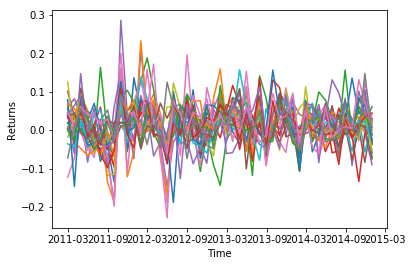

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
plt.plot(monthlyReturns);
plt.xlabel('Date')
plt.ylabel('Historical Monthly Returns')
plt.show()

### Note that different stocks exhibit variability in returns implying they have different risk characteristics

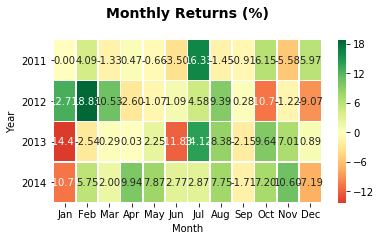

In [16]:
# Plot Heatmap to visualize returns
ticker = 'AAPL'
import monthly_returns_heatmap as mrh
mrh.plot(monthlyReturns[ticker])

In [17]:
# Compute mean and covariances
meanReturns = monthlyReturns.mean()
covMatrix = monthlyReturns.cov()

In [1]:
#See http://faculty.washington.edu/ezivot/econ424/portfolioTheoryMatrix.pdf
#    Eq:1.14

In [18]:
meanReturns

MMM     0.016622
AXP     0.018625
AAPL    0.021490
BA      0.016837
CAT     0.003687
CVX     0.007550
CSCO    0.010450
KO      0.009520
DIS     0.021769
XOM     0.006007
GE      0.009054
GS      0.007961
HD      0.025651
IBM     0.002412
INTC    0.015978
JNJ     0.015433
JPM     0.012394
MCD     0.008368
MRK     0.015704
MSFT    0.014676
NKE     0.021417
PFE     0.015469
PG      0.011090
UTX     0.010582
UNH     0.021887
VZ      0.010443
V       0.030221
WMT     0.012270
dtype: float64

In [19]:
covMatrix

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MRK,MSFT,NKE,PFE,PG,UTX,UNH,VZ,V,WMT
MMM,0.002219,0.001579,0.000753,0.001584,0.002289,0.001354,0.001385,0.000502,0.001720,0.001264,...,0.000487,0.000546,0.000876,0.001061,0.000640,0.001646,0.000981,-0.000029,0.001010,0.000490
AXP,0.001579,0.002483,0.000827,0.001691,0.001882,0.001004,0.001448,0.000642,0.001308,0.000878,...,0.000437,0.001061,0.000996,0.000779,0.000295,0.001384,0.000903,-0.000086,0.001178,0.000339
AAPL,0.000753,0.000827,0.005474,0.000587,0.000909,0.000912,0.001301,0.000652,0.000959,0.000659,...,0.000081,0.001322,0.000610,-0.000142,0.000537,0.000586,0.000693,-0.000293,0.000348,0.000551
BA,0.001584,0.001691,0.000587,0.002981,0.001323,0.000781,0.001178,0.000919,0.001462,0.000968,...,0.000753,0.000696,0.001195,0.001025,0.000433,0.001221,0.000620,0.000523,0.001195,0.000673
CAT,0.002289,0.001882,0.000909,0.001323,0.006478,0.001955,0.002251,0.000165,0.002022,0.001404,...,0.000861,0.001500,0.001094,0.001050,0.000300,0.002467,0.000830,-0.000606,0.000779,0.000115
CVX,0.001354,0.001004,0.000912,0.000781,0.001955,0.002397,0.000792,0.000495,0.001697,0.001647,...,0.000578,0.000427,0.000095,0.000827,0.000576,0.001205,0.000711,0.000184,0.000545,0.000024
CSCO,0.001385,0.001448,0.001301,0.001178,0.002251,0.000792,0.005509,-0.000131,0.000864,0.000746,...,0.000241,0.001280,0.000878,0.000137,0.000318,0.001823,0.000701,-0.000873,0.000651,0.000264
KO,0.000502,0.000642,0.000652,0.000919,0.000165,0.000495,-0.000131,0.001579,0.000608,0.000466,...,0.000640,0.000138,0.000182,0.000739,0.000472,0.000049,0.000133,0.000830,0.000405,0.000805
DIS,0.001720,0.001308,0.000959,0.001462,0.002022,0.001697,0.000864,0.000608,0.003150,0.001447,...,0.000659,0.000771,0.001152,0.001166,0.000460,0.001187,0.000949,0.000593,0.000956,0.000592
XOM,0.001264,0.000878,0.000659,0.000968,0.001404,0.001647,0.000746,0.000466,0.001447,0.001804,...,0.000751,0.000261,-0.000022,0.000775,0.000621,0.000994,0.000725,0.000225,0.000765,0.000154


In [20]:
monthlyReturns['AAPL']

Date
2011-01-31         NaN
2011-02-28    0.040935
2011-03-31   -0.013314
2011-04-29    0.004656
2011-05-31   -0.006569
2011-06-30   -0.034960
2011-07-29    0.163285
2011-08-31   -0.014469
2011-09-30   -0.009121
2011-10-31    0.061523
2011-11-30   -0.055783
2011-12-30    0.059655
2012-01-31    0.127111
2012-02-29    0.188311
2012-03-30    0.105284
2012-04-30   -0.025969
2012-05-31   -0.010702
2012-06-29    0.010853
2012-07-31    0.045822
2012-08-31    0.093850
2012-09-28    0.002803
2012-10-31   -0.107607
2012-11-30   -0.012196
2012-12-31   -0.090738
2013-01-31   -0.144094
2013-02-28   -0.025449
2013-03-29    0.002855
2013-04-30    0.000271
2013-05-31    0.022490
2013-06-28   -0.118303
2013-07-31    0.141225
2013-08-30    0.083772
2013-09-30   -0.021481
2013-10-31    0.096386
2013-11-29    0.070066
2013-12-31    0.008902
2014-01-31   -0.107697
2014-02-28    0.057474
2014-03-31    0.019953
2014-04-30    0.099396
2014-05-30    0.078720
2014-06-30    0.027662
2014-07-31    0.028731
2014-0

## Use custom functions to obtain optimal weights directly

In the cell below is the packed python file listed here. To get the optimal weight, use the function named 'calculate' with the input as the original return dataset.

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cvxopt as opt
from cvxopt import solvers


def create_random_weights(n_assets):
    '''
    returns randomly choosen portfolio weights that sum to one
    '''
    w = np.random.rand(n_assets)
    return w / w.sum()


def evaluate_random_portfolio(returns):
    '''
    returns the mean and standard deviation of returns for a random portfolio
    '''
    # in case a resampler is used
    returns = pd.DataFrame(returns)

    # calculate from covariance, asset returns and weights
    cov = np.matrix(returns.cov())
    R = np.matrix(returns.mean())
    w = np.matrix(create_random_weights(returns.shape[1]))

    # calculate expected portfolio return and risk
    mu = w * R.T
    sigma = np.sqrt(w * cov * w.T)

    return mu, sigma


def create_random_portfolios(returns, n_portfolios=1500):
    '''
    plots randomly created portfolios
    '''
    # calculate mean and std for every portfolio
    pf_mus, pf_sigmas = np.column_stack([evaluate_random_portfolio(returns) for _ in range(n_portfolios)])

    return pf_mus, pf_sigmas


def calculate_frontier(returns):
    '''
    returns optimal portfolio weights and corresponding sigmas for a desired optimal portfolio return
    Params:
    - returns: T x N matrix of observed data
    '''
    returns = pd.DataFrame(returns)
    cov = np.matrix(np.cov(returns.T))
    N = returns.shape[1]
    pbar = np.matrix(returns.mean())

    # define list of optimal / desired mus for which we'd like to find the optimal sigmas
    optimal_mus = []
    r_min = pbar.mean()  # minimum expected return
    for i in range(50):
        optimal_mus.append(r_min)
        r_min += (pbar.mean() / 100)

    # constraint matrices for quadratic programming
    P = opt.matrix(cov)
    q = opt.matrix(np.zeros((N, 1)))
    G = opt.matrix(np.concatenate((-np.array(pbar), -np.identity(N)), 0))
    A = opt.matrix(1.0, (1, N))
    b = opt.matrix(1.0)

    # hide optimization
    opt.solvers.options['show_progress'] = False

    # calculate portfolio weights, every weight vector is of size Nx1
    # find optimal weights with qp(P, q, G, h, A, b)
    optimal_weights = [
        solvers.qp(P, q, G, opt.matrix(np.concatenate((-np.ones((1, 1)) * mu, np.zeros((N, 1))), 0)), A, b)['x'] for mu
        in optimal_mus]

    # find optimal sigma
    # \sigma = w^T * Cov * w
    optimal_sigmas = [np.sqrt(np.matrix(w).T * cov.T.dot(np.matrix(w)))[0, 0] for w in optimal_weights]

    return optimal_weights, optimal_mus, optimal_sigmas


def calculate(returns, n_portfolios=3000):
    # calculate mus and sigmas for all and the optimal portfolios
    pf_mus, pf_sigmas = create_random_portfolios(returns, n_portfolios)
    optimal_weights, optimal_mus, optimal_sigmas = calculate_frontier(returns)

    return pd.DataFrame(optimal_weights)

### The original data:

The Original returns dataset has some NaN values, we need to drop it first.

In [9]:
monthlyReturns

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MRK,MSFT,NKE,PFE,PG,UTX,UNH,VZ,V,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-28,0.055271,0.004380,0.040935,0.042407,0.061025,0.101027,-0.122459,0.017025,0.125289,0.065735,...,-0.018089,-0.035609,0.079413,0.067121,-0.001267,0.032686,0.037272,0.036496,0.047953,-0.072945
2011-03-31,0.013770,0.037411,-0.013314,0.026663,0.081803,0.036048,-0.072791,0.045386,-0.014861,-0.016369,...,0.025276,-0.044771,-0.146791,0.055613,-0.022998,0.013287,0.064494,0.043879,0.007803,0.008286
2011-04-29,0.039679,0.090064,0.004656,0.079129,0.040673,0.018141,0.021574,0.016883,0.000232,0.045763,...,0.089064,0.020874,0.087450,0.032496,0.062211,0.058240,0.089159,-0.007094,0.061125,0.056292
2011-05-31,-0.023428,0.051345,-0.006569,-0.016741,-0.083268,-0.033946,-0.041096,-0.009635,-0.034107,-0.045765,...,0.022253,-0.028812,0.025875,0.032816,0.032357,-0.014809,-0.005688,-0.022499,0.039580,0.011010
2011-06-30,0.004980,0.005480,-0.034960,-0.052544,0.006238,-0.019731,-0.070833,0.014454,-0.062215,-0.025039,...,-0.029399,0.039584,0.069553,-0.039627,-0.051194,0.008431,0.057234,0.008123,0.039477,-0.037668
2011-07-29,-0.081286,-0.032108,0.163285,-0.046801,-0.068086,0.011474,0.026979,0.010700,-0.010758,-0.019538,...,-0.032871,0.053846,0.001889,-0.065583,-0.024810,-0.064061,-0.037805,-0.039799,0.015191,-0.008092
2011-08-31,-0.041268,-0.006595,-0.014469,-0.044286,-0.078854,-0.042211,-0.018785,0.035877,-0.118074,-0.065906,...,-0.030325,-0.023070,-0.038824,-0.003037,0.035616,-0.097723,-0.042515,0.024795,0.029190,0.016715
2011-09-30,-0.134852,-0.096761,-0.009121,-0.094975,-0.188571,-0.063234,-0.010849,-0.034499,-0.114504,-0.018779,...,-0.000106,-0.064286,-0.009622,-0.068493,-0.007852,-0.052391,-0.026013,0.017558,-0.024579,-0.024253


In [11]:
#drop none
monthlyReturns.dropna(how="all", inplace=True)

### Get the optimal weights:

In [20]:
weights = calculate(monthlyReturns)

In [21]:
weights[weights < 0.00001] = 0

weights

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.020003,0.0,0.000000,0.000000,0.000083,0.000000,0.0,0.000000,...,0.007046,0.077712,0.031028,0.000000,0.092786,0.036414,0.092020,0.217143,0.131686,0.083009
1,0.000000,0.000000,0.020623,0.0,0.000000,0.000000,0.000018,0.000000,0.0,0.000000,...,0.008949,0.077426,0.032241,0.000000,0.092027,0.034162,0.093399,0.215497,0.135579,0.083591
2,0.000000,0.000000,0.021276,0.0,0.000000,0.000000,0.000037,0.000000,0.0,0.000000,...,0.010960,0.077054,0.033419,0.000000,0.090890,0.031770,0.094471,0.213697,0.139251,0.083879
3,0.000000,0.000000,0.021937,0.0,0.000000,0.000000,0.000061,0.000000,0.0,0.000000,...,0.012712,0.076684,0.034519,0.000000,0.089455,0.029330,0.095355,0.211792,0.142857,0.084093
4,0.000000,0.000000,0.022590,0.0,0.000000,0.000000,0.000313,0.000000,0.0,0.000000,...,0.013944,0.076126,0.035476,0.000000,0.087263,0.026599,0.095738,0.209785,0.145868,0.084103
5,0.000000,0.000000,0.023241,0.0,0.000000,0.000000,0.000434,0.000000,0.0,0.000000,...,0.015295,0.075636,0.036470,0.000014,0.085291,0.024001,0.096266,0.207820,0.149012,0.084220
6,0.000000,0.000000,0.023895,0.0,0.000000,0.000000,0.000417,0.000000,0.0,0.000000,...,0.016560,0.075233,0.037439,0.000013,0.083330,0.021500,0.096810,0.205809,0.152278,0.084394
7,0.000000,0.000000,0.024545,0.0,0.000000,0.000000,0.000348,0.000000,0.0,0.000000,...,0.017680,0.074826,0.038371,0.000000,0.081219,0.019000,0.097255,0.203774,0.155411,0.084579
8,0.000000,0.000000,0.025177,0.0,0.000000,0.000000,0.000480,0.000000,0.0,0.000000,...,0.018652,0.074246,0.039272,0.000000,0.078800,0.016317,0.097485,0.201790,0.158090,0.084681
9,0.000029,0.000023,0.025819,0.0,0.000019,0.000030,0.000798,0.000020,0.0,0.000019,...,0.019841,0.073534,0.040220,0.000043,0.076399,0.013436,0.097708,0.199824,0.160648,0.084653
